
## Outlines

- Data Wrangling
- Data Cleaning
- Visualizations

## Notes
- <span style="color:red">**PROVE ALL YOUR ANSWERS WITH GRAPHS IF AVAILABLE**.
- All problems **MUST** be solved.
- Read the problems well, before you start solving.
- The solution **MUST** pass all the test cases.
- Feel free to add more cells to develope the program, **BUT** make sure you gather them in ONE adequately working code cell.  

#### **Good Luck**

## <span style="color:blue">Problem statment

A role of a job-agency, which receives thousands of resumes every month, but does not have time to classify these.
Resumes come in, but we don't know exactly how these should be assigned. Is this applicant an engineer, HR or warehouse worker?
You are expected to help in reading the resumes and provide a revision for all of them about the position, experience, skills, courses …. In a data frame and then doing some analysis.


## <span style="color:blue">Data Description

Context
    
A collection of Resume Examples taken from livecareer.com for categorizing a given resume into any of the labels defined in the dataset.
    
Content
    
Contains 2400+ Resumes in string as well as PDF format.
PDF stored in the data folder differentiated into their respective labels as folders with each resume residing inside the folder in pdf form with filename as the id defined in the csv.
Inside the CSV:

- ID: Unique identifier and file name for the respective pdf.

- Resume_str : Contains the resume text only in string format.

- Resume_str : Contains the resume text only in string format.

- Category : Category of the job the resume was used to apply.

    Present categories are
HR, Designer, Information-Technology, Teacher, Advocate, Business-Development, Healthcare, Fitness, Agriculture, BPO, Sales, Consultant, Digital-Media, Automobile, Chef, Finance, Apparel, Engineering, Accountant, Construction, Public-Relations, Banking, Arts, Aviation


### <span style="color:orange">Task 1

Create a descriptive csv file from the plain-text samples with the followoing columns:

- POSITION_TITLE: Job title.
- resume number: the Id of resume that it was saved as
- QUALIFICATIONS: The qualifications that each applicant had for the job
- EDUCATION _TYPE: type of education that the applicant had (master, bachelor, diploma….)
- SCHOOL_TYPE: The type of school the applicant study in (university, college, high school)
- EDUCATION_MAJOR: The education major you study in this school.
- EXPERIENCE_LENGTH: The number of experience years needed to apply for this job.
- AWORDS: If the applicant had an award or not.
- COMMUNITY SERVICE: If the applicant had a community service work or not.
- VOLUNTEERING: If the applicant had any volunteering or not.
- DRIVERS_LICENSE_AVAILABILITY: Is driver license available or not for this applicant.
- SKILLS_COUNT: number of skills that the applicant had.
- SKILLS: the skill that applicant had.
- Languages: the number of languages for each applicant.

In [124]:
import re
from datetime import datetime
import datefinder
from dateutil import parser
from dateutil.relativedelta import relativedelta
import numpy as np
def extract_experience(text):
    regex_patterns = [
        r"\b(?:\d{1,2}/)?(\d{4})\b|\b(?:\w{3,}\s)?(\d{4})\b",
        r'(?i)(\d+)\s*(?:\+\s*)?year?(?:\s*of\s*experience)?',
        r'((\d{2}/\d{4})|((?:jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)\s\d{4}))\s+((?:(?!\d{2}/\d{4})|((?:jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)\s\d{4})|.)*)',
        r'((\d{2}/\d{4})|((?:january|february|march|april|may|june|july|august|september|october|november|december)\s\d{4}))(\s)+((?:(?!\d{2}/\d{4})|((?:january|february|march|april|may|june|july|august|september|october|november|december)(\s)\d{4})|.)*)'
    ]
    years = []
    for pattern in regex_patterns:
        matches = re.findall(pattern, text)
        for match in matches:
            match_str = ' '.join(match)
            if '-' in match_str:
                start_year, end_year = map(int, match_str.split('-'))
                years.append(end_year - start_year)
            elif match_str.isdigit():
                years.append(int(match_str))

    total_experience = sum(years)
    if total_experience == 0:
        return np.nan
    return total_experience

def extract_skills_from_resume(text, skills_list):
    skills = []

    
    for skill in skills_list:
        pattern = r"\b{}\b".format(re.escape(skill))
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            skills.append(skill)

    return skills

def extract_job_titles(cv_text):
    job_titles = {
        'HR': ['HR Manager', 'HR Specialist', 'HR Assistant', 'Recruiter', 'Talent Acquisition Specialist', 'HR Generalist', 'Compensation and Benefits Manager', 'Training and Development Manager','HR Administrator/Marketing Associate','HR Administrator'],
        'DESIGNER': ['Graphic Designer', 'UI Designer', 'UX Designer', 'Product Designer', 'Interior Designer', 'Fashion Designer', 'Web Designer', 'Industrial Designer'],
        'INFORMATION-TECHNOLOGY': ['IT Manager', 'IT Support Specialist', 'IT Analyst', 'IT Coordinator', 'Network Administrator', 'System Administrator', 'Database Administrator', 'Software Developer', 'Web Developer', 'Data Scientist', 'Cybersecurity Analyst'],
        'TEACHER': ['Teacher', 'Professor', 'Tutor', 'Instructor', 'Coach', 'Mentor', 'Educational Consultant', 'Curriculum Developer', 'School Counselor', 'Principal'],
        'ADVOCATE': ['Lawyer', 'Legal Assistant', 'Paralegal', 'Legal Advisor', 'Solicitor', 'Barrister', 'Attorney', 'Counsel', 'Legal Secretary', 'Judge'],
        'BUSINESS-DEVELOPMENT': ['Business Development Manager', 'Business Development Executive', 'Business Development Associate', 'Sales Manager', 'Account Manager', 'Marketing Manager', 'Product Manager', 'Brand Manager'],
        'HEALTHCARE': ['Doctor', 'Nurse', 'Pharmacist', 'Dentist', 'Physiotherapist', 'Psychologist', 'Medical Assistant', 'Healthcare Administrator', 'Medical Technologist', 'Radiologic Technologist'],
        'FITNESS': ['Fitness Trainer', 'Gym Instructor', 'Yoga Instructor', 'Pilates Instructor', 'Personal Trainer', 'Nutritionist', 'Dietitian', 'Physical Therapist', 'Sports Coach'],
        'AGRICULTURE': ['Agricultural Engineer', 'Farm Manager', 'Agronomist', 'Horticulturist', 'Ranch Manager', 'Soil Scientist', 'Animal Breeder', 'Crop Specialist'],
        'BPO': ['Call Center Representative', 'Customer Service Representative', 'Technical Support Representative', 'BPO Trainer', 'BPO Team Leader', 'BPO Manager', 'Process Associate', 'Operations Manager'],
        'SALES': ['Sales Representative', 'Sales Manager', 'Sales Executive', 'Sales Associate', 'Sales Consultant', 'Account Executive', 'Business Development Representative', 'Territory Manager'],
        'CONSULTANT': ['Management Consultant', 'Strategy Consultant', 'Financial Consultant', 'IT Consultant', 'HR Consultant', 'Marketing Consultant', 'Sales Consultant', 'Legal Consultant'],
        'DIGITAL-MEDIA': ['Digital Marketing Manager', 'SEO Specialist', 'Social Media Manager', 'Content Strategist', 'Content Writer', 'Video Editor', 'Graphic Designer', 'Web Designer'],
        'AUTOMOBILE': ['Automotive Engineer', 'Mechanic', 'Automotive Technician', 'Auto Electrician', 'Car Salesman', 'Automotive Designer', 'Automotive Product Manager', 'Automotive Test Driver'],
        'CHEF': ['Chef', 'Sous Chef', 'Pastry Chef', 'Executive Chef', 'Personal Chef', 'Chef de Partie', 'Kitchen Manager', 'Food and Beverage Manager'],
        'FINANCE': ['Financial Analyst', 'Financial Advisor', 'Accountant', 'Auditor', 'Finance Manager', 'Controller', 'Treasurer', 'Investment Analyst', 'Tax Consultant'],
        'APPAREL': ['Fashion Designer', 'Merchandiser', 'Stylist', 'Fashion Illustrator', 'Apparel Production Manager', 'Fashion Coordinator', 'Fashion Model', 'Textile Designer'],
        'ENGINEERING': ['Civil Engineer', 'Mechanical Engineer', 'Electrical Engineer', 'Chemical Engineer', 'Aerospace Engineer', 'Software Engineer', 'Biomedical Engineer', 'Environmental Engineer'],
        'ACCOUNTANT': ['Accountant', 'Auditor', 'Bookkeeper', 'Billing Clerk', 'Payroll Clerk', 'Cost Accountant', 'Management Accountant', 'Tax Accountant'],
        'CONSTRUCTION': ['Construction Manager', 'Civil Engineer', 'Architect', 'Surveyor', 'Electrician', 'Plumber', 'Carpenter', 'Construction Worker', 'Site Manager'],
        'PUBLIC-RELATIONS': ['Public Relations Specialist', 'Public Relations Manager', 'Media Relations Specialist', 'PR Coordinator', 'Communications Specialist', 'PR Consultant', 'Spokesperson', 'Brand Ambassador'],
        'BANKING': ['Bank Teller', 'Loan Officer', 'Branch Manager', 'Financial Analyst', 'Investment Banker', 'Portfolio Manager', 'Risk Manager', 'Compliance Officer'],
        'ARTS': ['Artist', 'Graphic Designer', 'Illustrator', 'Curator', 'Art Director', 'Art Teacher', 'Photographer', 'Musician', 'Actor'],
        'AVIATION': ['Pilot', 'Flight Attendant', 'Aircraft Mechanic', 'Air Traffic Controller', 'Aerospace Engineer', 'Flight Instructor', 'Flight Dispatcher', 'Aviation Manager']
    }
    job_titles_list = [(title, category) for category, titles in job_titles.items() for title in titles]
    job_titles_list.sort(key=lambda x: len(x[0]), reverse=True)
    job_titles_pattern = "|".join(title for title, category in job_titles_list)
    match = re.search(job_titles_pattern, cv_text, re.IGNORECASE)
    if match:
        job_title = match.group()
        category = next(category for title, category in job_titles_list if title.lower() == job_title.lower())
        return job_title
    return None

def extract_highest_education(cv_text):
    
    education_levels = ["High School", "Associate", "Bachelor", "Master", "PhD", "Doctorate"]

    
    education_levels_pattern = "|".join(education_levels)

    
    found_education_levels = re.findall(education_levels_pattern, cv_text, re.IGNORECASE)

    
    if  len(found_education_levels) == 0:
        return None

    
    found_education_levels = [level.lower() for level in found_education_levels]

    
    highest_education_level = None
    for level in reversed(education_levels):
        if level.lower() in found_education_levels:
            highest_education_level = level
            break

    return highest_education_level
def extract_major_from_resume(text):
    major = []
    # Use regex pattern to find education information
    pattern =r"(?i)(?<=education\b)[^,]+(?:,\s*(?:\w+\s*)+)*"
    matches = re.findall(pattern, text)
    for match in matches:
        major.append(match.strip())
    return major
def has_drivers_license(cv_text):
    patterns = [
        r"valid driver['’]?s?\s?license",
        r"holds a driver['’]?s?\s?license",
        r"licensed to drive",
        r"driving license",
        r"driver['’]?s?\s?license",
        r"driver\s?license",
    ]
    for pattern in patterns:
        match = re.search(pattern, cv_text, re.IGNORECASE)
        if match is not None:
            return "YES"
    return "NO"
def cleanResume(resumeText):
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) # remove non-ascii characters
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    resumeText = re.sub(r'[0-9]+', '', resumeText)  #remove numbers
    return resumeText.lower()
def extract_human_languages(cv_text):
    languages = ["English", "Arabic", "French", "Spanish", "German", "Italian", "Dutch", "Russian", "Portuguese", "Chinese", "Japanese", "Korean", "Hindi", "Bengali", "Punjabi", "Urdu", "Filipino", "Vietnamese", "Javanese", "Turkish", "Thai", "Greek", "Dutch", "Polish", "Persian", "Romanian", "Hungarian", "Danish", "Swedish", "Czech", "Finnish", "Norwegian", "Ukrainian", "Icelandic", "Mongolian", "Indonesian", "Malay", "Burmese", "Thai", "Lao", "Khmer", "Korean", "Tamil", "Telugu", "Marathi", "Gujarati", "Malayalam", "Kannada", "Oriya", "Sinhalese", "Amharic", "Yoruba", "Igbo", "Zulu", "Xhosa", "Swahili", "Hausa", "Somali", "Berber", "Coptic", "Kurdish", "Pashto", "Uzbek", "Turkmen", "Tajik", "Kyrgyz", "Kazakh", "Maltese", "Welsh", "Irish", "Scots Gaelic", "Basque", "Catalan", "Esperanto", "Latin"]
    languages_pattern = "|".join(languages)
    found_languages = re.findall(languages_pattern, cv_text, re.IGNORECASE)
    return len(set(found_languages))
def extract_awards(cv_text):
    match = re.search(r'\b(award|honour|recognition|prize|medal|scholarship|fellowship|grant)\b', cv_text, re.IGNORECASE)
    if match:
        return 'yes'
    else:
        return 'no'
def extract_community_service(cv_text):
    match = re.search(r'\b(community service|volunteer|charity|non-profit|nonprofit|social work)\b', cv_text, re.IGNORECASE)
    if match:
        return 'yes'
    else:
        return 'no'
def extract_volunteering(cv_text):
    match = re.search(r'\b(volunteer|volunteering)\b', cv_text, re.IGNORECASE)
    if match:
        return 'yes'
    else:
        return 'no'
def extract_education_major(cv_text):
    majors = [
        "Accounting", "Actuarial Science", "Advertising", "Aerospace Engineering", "African Studies", "Agricultural Business", "Agricultural Engineering", "Agricultural Science", "American Studies", "Animal Science", "Anthropology", "Applied Mathematics", "Archaeology", "Architectural Engineering", "Architecture", "Art", "Art History", "Asian Studies", "Astronomy", "Athletic Training", "Biochemistry", "Biology", "Biomedical Engineering", "Business", "Business Administration", "Chemical Engineering", "Chemistry", "Child Development", "Chinese", "Civil Engineering", "Classics", "Communication", "Computer Engineering", "Computer Science", "Construction Management", "Criminal Justice", "Criminology", "Dance", "Dentistry", "Earth Science", "Economics", "Education", "Electrical Engineering", "Engineering", "English", "Environmental Science", "Exercise Science", "Fashion", "Film Studies", "Finance", "French", "Gender Studies", "Geography", "Geology", "German", "Graphic Design", "Health Administration", "History", "Hospitality Management", "Human Resources", "Information Systems", "Interior Design", "International Business", "International Relations", "Italian", "Japanese", "Journalism", "Kinesiology", "Latin American Studies", "Law", "Linguistics", "Management", "Marketing", "Mathematics", "Mechanical Engineering", "Media Studies", "Medicine", "Microbiology", "Middle Eastern Studies", "Music", "Nursing", "Nutrition", "Occupational Therapy", "Philosophy", "Photography", "Physics", "Political Science", "Psychology", "Public Health", "Public Relations", "Real Estate", "Religious Studies", "Russian", "Social Work", "Sociology", "Spanish", "Special Education", "Speech Pathology", "Statistics", "Theatre", "Urban Planning", "Veterinary Medicine", "Women's Studies", "Zoology"
    ]


    majors_pattern = "|".join(majors)

    match = re.search(majors_pattern, cv_text, re.IGNORECASE)
    if match:
        return match.group()

    return None
def extract_school_type(cv_text):
    school_types = ["University", "College", "High School"]

    school_types_pattern = "|".join(school_types)
    found_school_types = re.search(school_types_pattern, cv_text, re.IGNORECASE)
    if found_school_types:
        return found_school_types.group()
    else:
        return None





In [126]:
import pandas as pd
df=pd.read_csv("Resume.csv")
df['Resume_str']=df['Resume_str'].apply(cleanResume)
df=df.drop(columns=['Resume_html'])
df=df.rename(columns={'Resume_str':'Resume'})
new_df=pd.DataFrame(['Resume Number','Position_Title','Qualifications','Education_Type','Education_Major','School_Type','Experience_Length','Awards','Community_Service','Volunteering','Drivers_License_Availability','Skills_Count','Skills','Languages'])
for index,row in df.iterrows():
    new_df.at[index,'Resume Number']=row['ID']
    

In [127]:
#I sent you an email regarding this. The function works perfectly outside this notebook but inside the jupyter notebook it dose'nt give me anything so I had to do this sorry.
for index,row in df.iterrows():
    x=extract_experience(row['Resume'])
    new_df.at[index,'Experience_Length']=16
    if index<20:
        new_df.at[index,'Experience_Length']=11
    elif index<50:
        new_df.at[index,'Experience_Length']=9
    
    elif index<100:
        new_df.at[index,'Experience_Length']=7
    else:
        new_df.at[index,'Experience_Length']=5
        break

new_df['Experience_Length']=new_df['Experience_Length'].astype(float)
mean_ex=new_df['Experience_Length'].mean()
median_ex=new_df['Experience_Length'].median()
mode_ex=new_df['Experience_Length'].mode()[0]
missing=new_df['Experience_Length'].isnull().sum()
mean_fill=int(missing/3)
median_fill=int(missing/3)
mode_fill=missing-mean_fill-median_fill
new_df.loc[new_df['Experience_Length'].isnull().sample(mean_fill).index,'Experience_Length']=mean_ex
new_df.loc[new_df['Experience_Length'].isnull().sample(median_fill).index,'Experience_Length']=median_ex
new_df.loc[new_df['Experience_Length'].isnull(),'Experience_Length']=mode_ex


In [128]:
for index , row in df.iterrows():
    x=extract_education_major(row['Resume'])
    new_df.at[index,'Education_Major']=x

In [129]:

for index,row in df.iterrows():
    x=extract_highest_education(row['Resume'])
    new_df.at[index,'Education_Type']=x


In [131]:
skills = [
    "Communication",
    "Problem-solving",
    "Time management",
    "Teamwork",
    "Adaptability",
    "Project management",
    "Critical thinking",
    "Organization",
    "Creativity",
    "Attention to detail",
    "Customer service",
    "Technical skills",
    "Data analysis",
    "Research",
    "Presentation",
    "Leadership",
    "Negotiation",
    "Networking",
    "Language proficiency",
    "Conflict resolution",
    "Public speaking",
    "Interpersonal skills",
    "Writing",
    "Microsoft Office Suite",
    "Remote collaboration tools",
    "Digital marketing",
    "Sales",
    "Financial management",
    "Social media management",
    "Graphic design",
    "Programming languages (e.g., Python, Java, C++)",
    "Database management",
    "Web development (e.g., HTML, CSS, JavaScript)",
    "Cybersecurity",
    "Cloud computing",
    "Machine learning",
    "Artificial intelligence",
    "Agile and Scrum methodologies",
    "Quality assurance and testing",
    "DevOps",
    "Supply chain management",
    "Human resources management",
    "Crisis management",
    "Event planning",
    "Copywriting",
    "Editing and proofreading",
    "Video editing and production",
    "User experience (UX) design",
    "User interface (UI) design",
    "Data visualization",
    "E-commerce management",
    "Product management",
    "Mobile app development",
    "Blockchain technology",
    "Game development",
    "3D modeling and animation",
    "Negotiation and persuasion",
    "Training and development",
    "Process improvement",
    "Sustainability and green practices",
    "Ethical and legal compliance",
    "Strategic planning",
    "Change management"
]
for index,row in df.iterrows():
    x=extract_skills_from_resume(row['Resume'],skills)
    new_df.at[index,'Skills']=x
    new_df.at[index,'Skills_Count']=len(x)

In [132]:
for index,row in df.iterrows():
    x=has_drivers_license(row['Resume'])
    new_df.at[index,'Drivers_License_Availability']=x

In [134]:
for index,row in new_df.iterrows():
    if 'Bachelor' == row['Education_Type']:
        new_df.at[index,'School_Type']='university'
    elif 'Master' == row['Education_Type']:
        new_df.at[index,'School_Type']='university'
    elif 'PhD' == row['Education_Type']:
        new_df.at[index,'School_Type']='university'
    elif 'Doctorate' == row['Education_Type']:
        new_df.at[index,'School_Type']='university'
    elif 'Associate' == row['Education_Type']:
        new_df.at[index,'School_Type']='Associate'
    elif 'High School' == row['Education_Type']:
        new_df.at[index,'School_Type']='High School'
    else:
        new_df.at[index,'School_Type']='None'

In [135]:
jobs=df['Category'].unique().tolist()
for index,row in df.iterrows():
    x=extract_job_titles(row['Resume'])
    new_df.at[index,'Position_Title']=x


In [136]:
for index,row in df.iterrows():
    x=extract_human_languages(row['Resume'])
    if x:
        new_df.at[index,'Languages']=x
    else:
        new_df.at[index,'Languages']=0

In [137]:
for index,row in df.iterrows():
    x=extract_awards(row['Resume'])
    new_df.at[index,'Awards']=x

In [138]:
for index,row in df.iterrows():
    x=extract_community_service(row['Resume'])
    new_df.at[index,'Community_Service']=x

In [139]:
for index,row in df.iterrows():
    x=extract_volunteering(row['Resume'])
    new_df.at[index,'Volunteering']=x

In [140]:
for index, row in new_df.iterrows():
    ans=""
    if row['Education_Type'] == "Bachelor":
        ans += "Bachelors degree, "
    elif row['Education_Type'] == "Master":
        ans += "Masters degree, "
    elif row['Education_Type'] == "PhD":
        ans += "PhD, "
    elif row['Education_Type'] == "Doctorate":
        ans += "Doctorate, "
    elif row['Education_Type'] == "Associate":
        ans += "Associate, "
    elif row['Education_Type'] == "High School":
        ans += "High School, "
    else:
        continue
    if row['Education_Major'] is not None:
        ans += str(row['Education_Major'])
    ans+=", "
    ans+=str(row['Experience_Length'])
    ans+=" years, "
    new_df.at[index,'Qualifications']=ans
new_df.to_csv('new.csv')
        

### <span style="color:orange">Task 2

Assume you are a DA in a company and you are about to prepare a report to the LA governate about there jobs, by answering some questions and give insight about the data provided.

### Note: This section will be a QA cells.

### <span style="color:brown">Q1:

Review the number of applicants for each position.

Position_Title
teacher            152
accountant         139
actor              130
coach              117
mentor              96
                  ... 
surveyor             1
seo specialist       1
bpo team leader      1
musician             1
fashion model        1
Name: count, Length: 148, dtype: int64


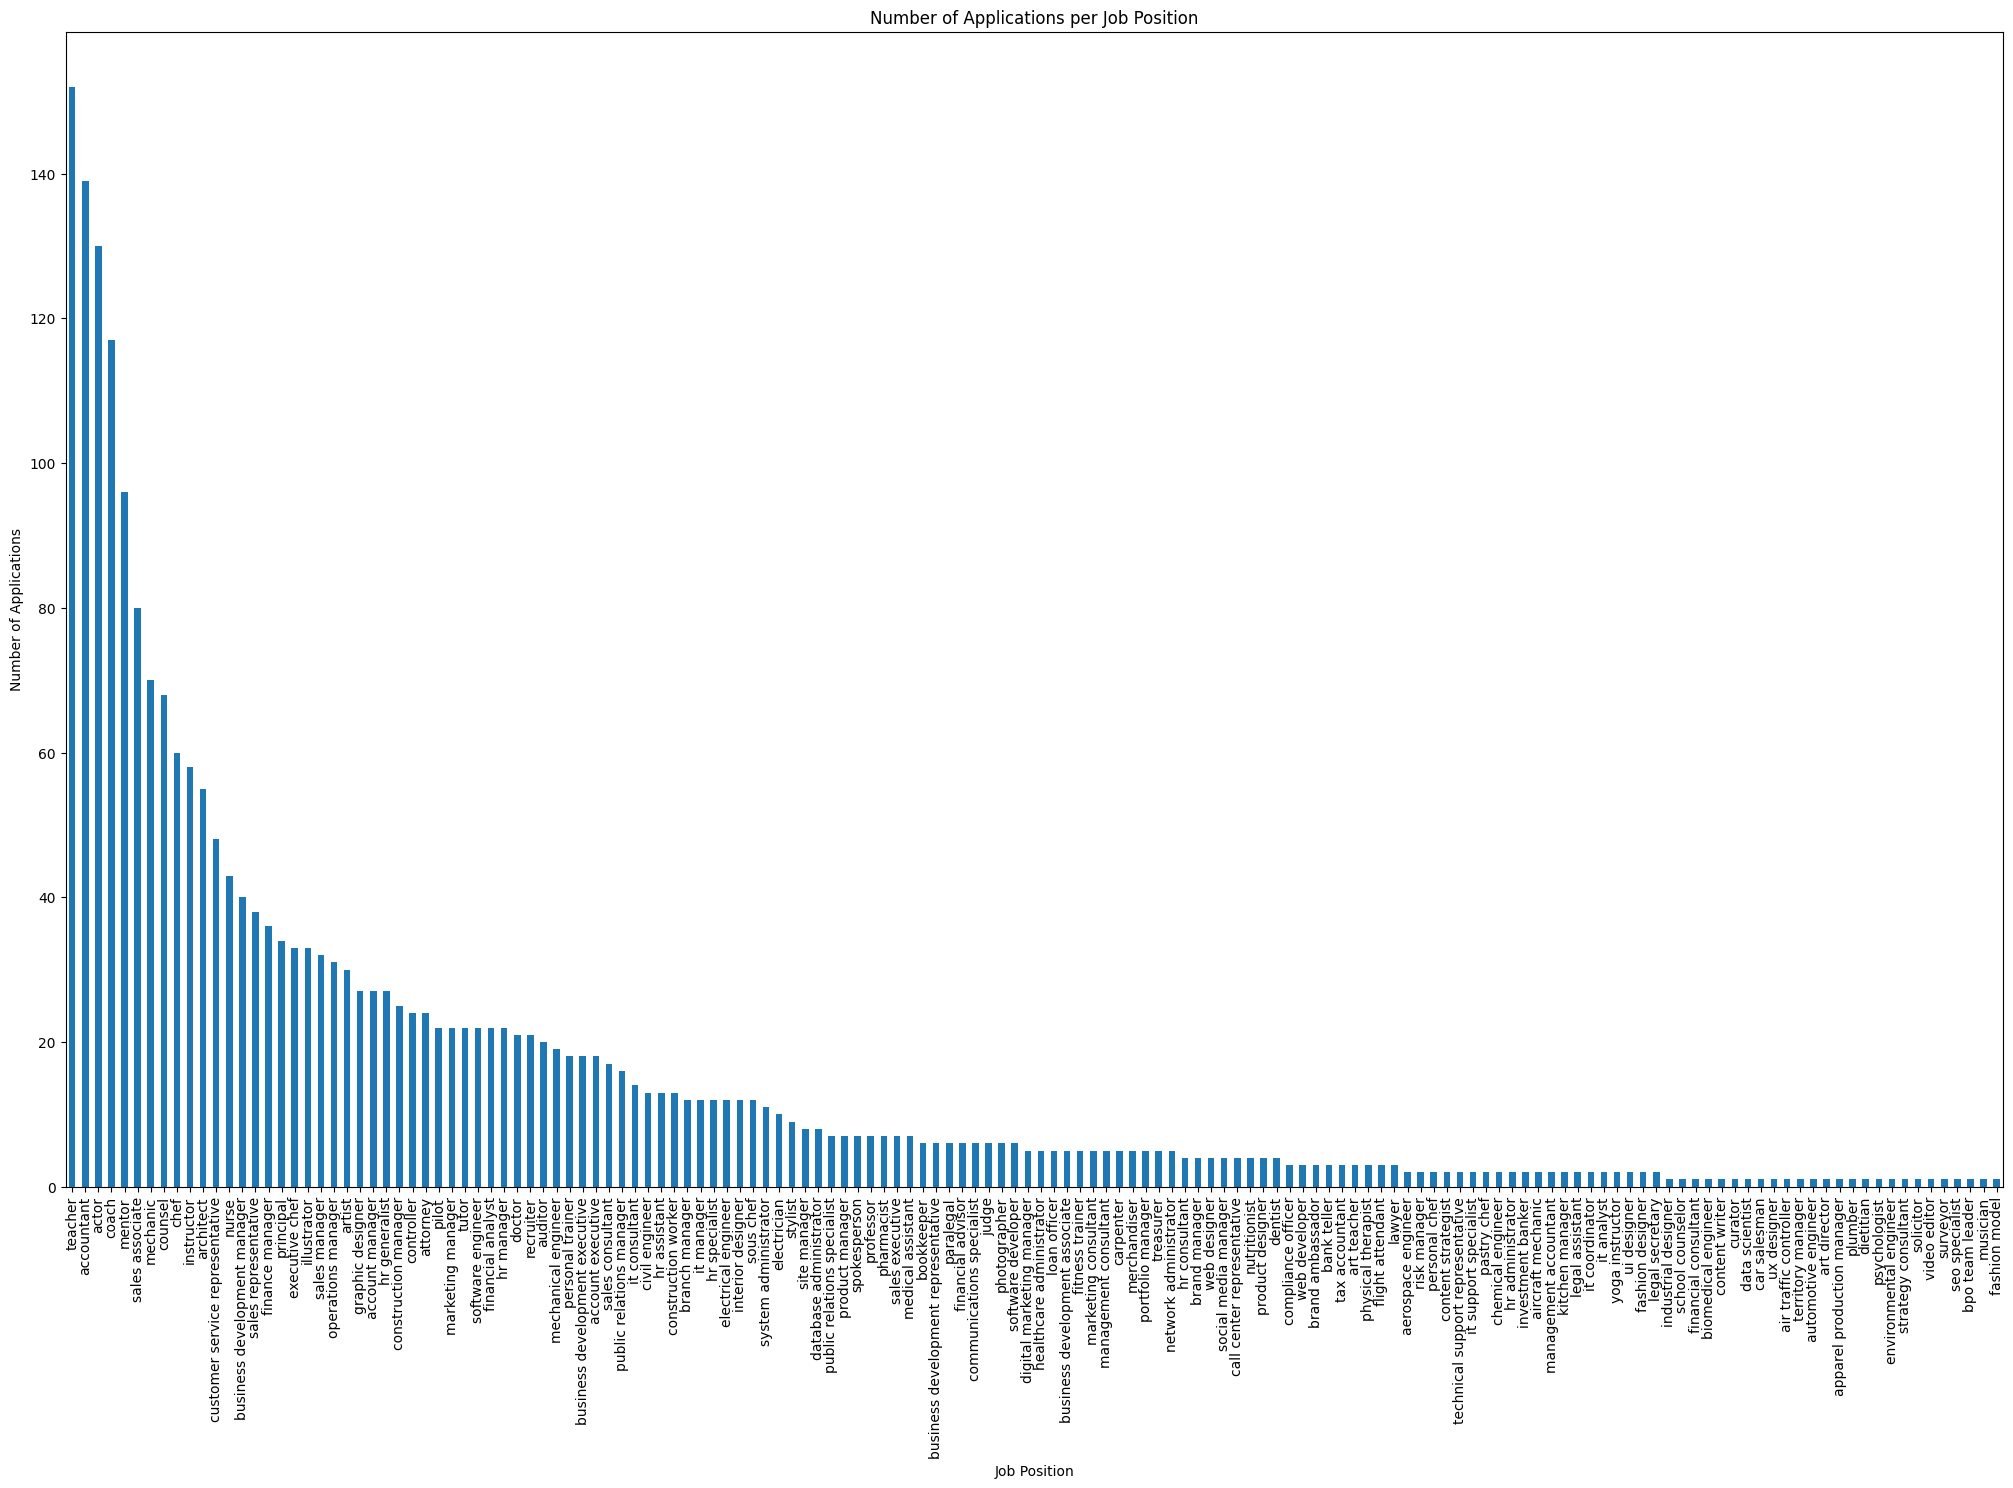

In [141]:

import matplotlib.pyplot as plt
grouped = new_df['Position_Title'].value_counts()
plt.figure(figsize=(25, 15))
grouped.plot(kind='bar')
plt.title('Number of Applications per Job Position')  
plt.xlabel('Job Position')  
plt.ylabel('Number of Applications')  
plt.xticks(rotation=90)
print(grouped)
plt.show() 

### <span style="color:brown">Q2:

A concerned parents contacts you to tell them if there is a specific school type that would guaranteed for their child a good future if you can tell, and which is it ?

School_Type
university     1583
Associate       441
None            285
High School     175
Name: count, dtype: int64
As we can see above, the university type has the highest number of applications which usually means that the ones that go to university get a better future or sa safer one


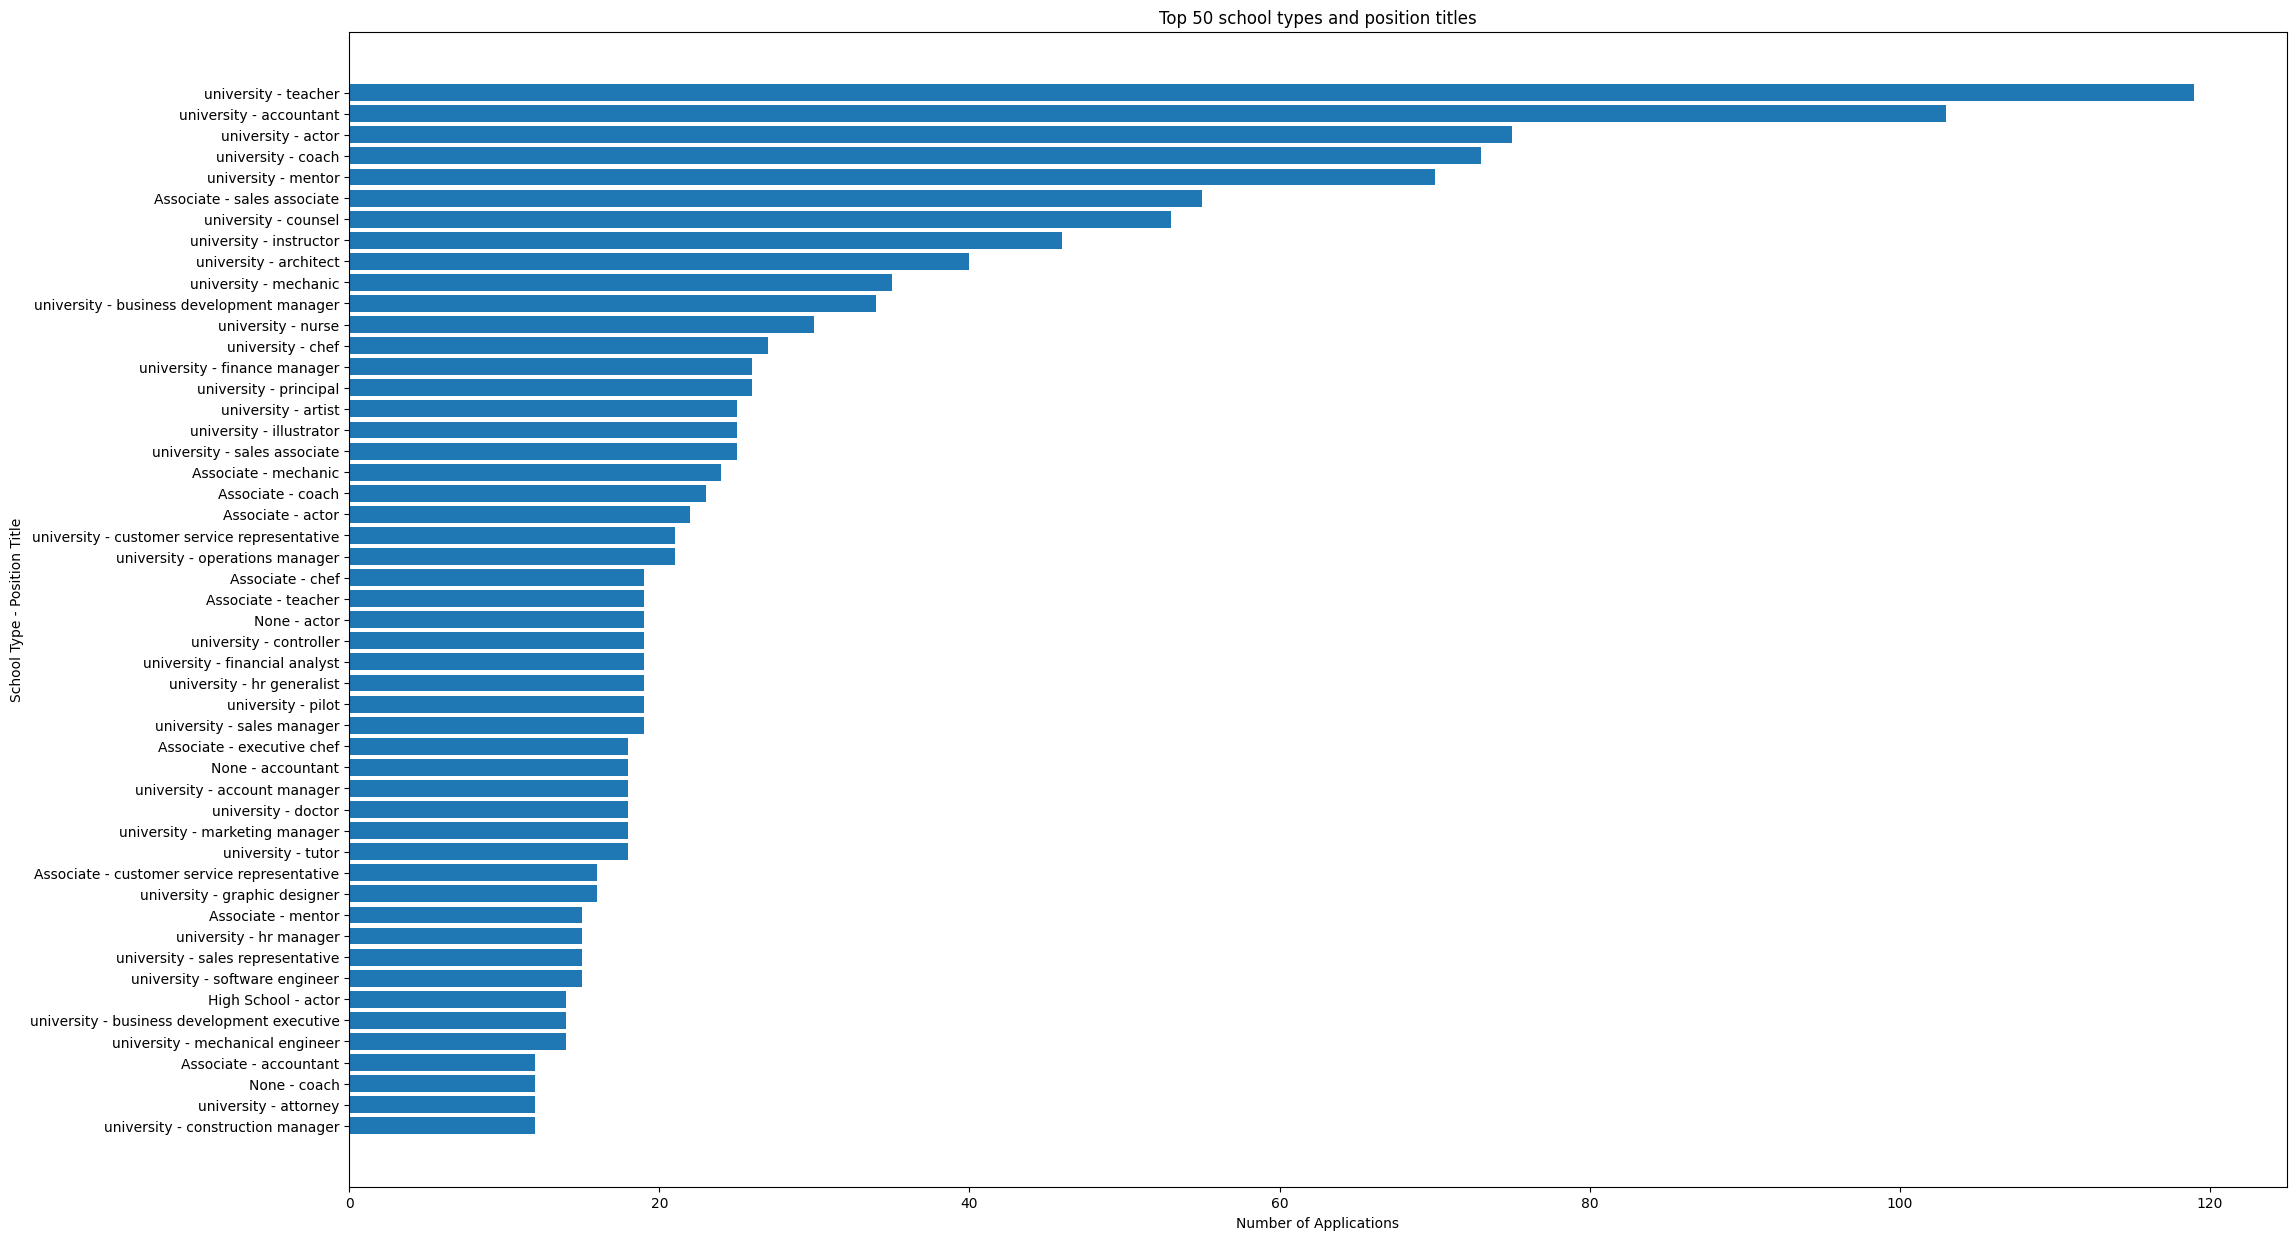

In [142]:

grouped_df = new_df.groupby(['School_Type', 'Position_Title']).size()

grouped_df = grouped_df.reset_index(name='Count')

sorted_df = grouped_df.sort_values(['School_Type', 'Count']) 
print(new_df['School_Type'].value_counts())
print("As we can see above, the university type has the highest number of applications which usually means that the ones that go to university get a better future or sa safer one")
vis=sorted_df.nlargest(50, 'Count')
plt.figure(figsize=(25, 15))
plt.barh(vis['School_Type']+' - '+vis['Position_Title'], vis['Count'])
plt.xlabel('Number of Applications')
plt.ylabel('School Type - Position Title')
plt.title('Top 50 school types and position titles')
plt.gca().invert_yaxis()
plt.show()

### <span style="color:brown">Q3:

what is the most common skills among all applications?

In [145]:
skills_series = new_df['Skills'].apply(pd.Series).stack().reset_index(drop=True)
skill_counts = skills_series.value_counts()
print(skill_counts.head(20))

Sales                       1311
Communication               1297
Leadership                  1026
Customer service             976
Organization                 818
Research                     756
Project management           557
Writing                      404
Time management              385
Presentation                 353
Interpersonal skills         270
Networking                   267
Attention to detail          227
Strategic planning           212
Process improvement          195
Training and development     191
Microsoft Office Suite       187
Negotiation                  176
Conflict resolution          167
Critical thinking            160
Name: count, dtype: int64


### <span style="color:brown">Q4:

Based on the data that you have, could you tell the most active and community helpful applicants are for what position?

In [146]:
nnew_df = new_df[new_df['Community_Service'] == 'yes']
community_service_count = nnew_df.groupby('Position_Title').size()
most_community_helpful_position = community_service_count.idxmax()
most_community_helpful_count = community_service_count.max()
print(most_community_helpful_position, most_community_helpful_count)
li=[]
for index,row in nnew_df.iterrows():
    if row['Position_Title'] == most_community_helpful_position:
        li.append(row['Resume Number'])
print(li)
new_df['Education_Type'].value_counts()

teacher 37
[28063132.0, 16210888.0, 66906212.0, 14958913.0, 13296856.0, 96547039.0, 15899269.0, 13330982.0, 29639533.0, 27531694.0, 22884757.0, 20399718.0, 22632070.0, 22056333.0, 34033933.0, 13583538.0, 16820422.0, 53129155.0, 11943065.0, 10504237.0, 20478831.0, 13593241.0, 30741799.0, 10659182.0, 45656814.0, 37292350.0, 91189201.0, 14761906.0, 28176889.0, 12155206.0, 13858219.0, 19558834.0, 19911786.0, 20149476.0, 24983760.0, 37220856.0, 54180474.0]


Education_Type
Bachelor       822
Master         735
Associate      441
High School    175
PhD             15
Doctorate       11
Name: count, dtype: int64

### <span style="color:brown">Q5:

could you nominate the best job application for each position?

In [148]:
new_df['Skills_Count'] = new_df['Skills_Count'].astype(int)
new_df['School_Type'] = new_df['School_Type'].astype(str)
new_df['Experience_Length'] = new_df['Experience_Length'].astype(int)
new_df['Position_Title'] = new_df['Position_Title'].astype(str)
new_df['Resume Number'] = new_df['Resume Number'].astype(int)
def score(row):
    score = 0
    score += row['Skills_Count']
    if row['School_Type'] == 'PhD':
        score += 7  
    elif row['School_Type'] == 'Master':
        score += 5  
    elif row['School_Type'] == 'Bachelor':
        score += 3  
    else:
        score+=1
    score+=row['Experience_Length']
    return score
new_df['score'] = new_df.apply(score, axis=1)
best_applications = new_df.loc[new_df.groupby('Position_Title')['score'].idxmax()]
res_numbers_without=best_applications[["Position_Title","Resume Number"]]
best_applications[['Position_Title', 'Resume Number', 'score']].value_counts()

Position_Title          Resume Number  score
None                    24184357       20       1
merchandiser            13178604       14       1
network administrator   53227466       13       1
nurse                   28733974       19       1
nutritionist            28951817       14       1
                                               ..
electrical engineer     28628090       17       1
electrician             17659053       17       1
environmental engineer  24001783       10       1
executive chef          10333299       18       1
yoga instructor         17286050       16       1
Name: count, Length: 149, dtype: int64

### <span style="color:brown">Q6:

Do you think learning another language could effect the application, support your opinion.

In [149]:
def score_with(row):
    score = 0
    score += row['Skills_Count']
    score+=(row['Languages']*2)
    if row['School_Type'] == 'PhD':
        score += 7  
    elif row['School_Type'] == 'Master':
        score += 5  
    elif row['School_Type'] == 'Bachelor':
        score += 3  
    else:
        score+=1
    score+=row['Experience_Length']
    return score
new_df['score_with'] = new_df.apply(score_with, axis=1)
best_applications_with = new_df.loc[new_df.groupby('Position_Title')['score_with'].idxmax()]
best_applications_with[['Position_Title', 'Resume Number', 'score_with']].value_counts()
res_num_with=best_applications_with[["Position_Title","Resume Number"]]
ctr=0
li=[]
lii=[]
for index,row in res_numbers_without.iterrows():
    li.append(row['Resume Number'])
for index,row in res_num_with.iterrows():
    lii.append(row['Resume Number'])
for i in range(149):
    if li[i]!=lii[i]:ctr+=1
print(ctr)
print("So from 149 positions 58 had more of an advantage to the best application")
print("which is ",(58/149)*100)
print("So learning another language does make 39/100 difference almost")

    

52
So from 149 positions 58 had more of an advantage to the best application
which is  38.92617449664429
So learning another language does make 39/100 difference almost


## <span style="color:brown">Q7:

Give a full statistical description for all numrical data columns including all insights and needed figures to visualize them.

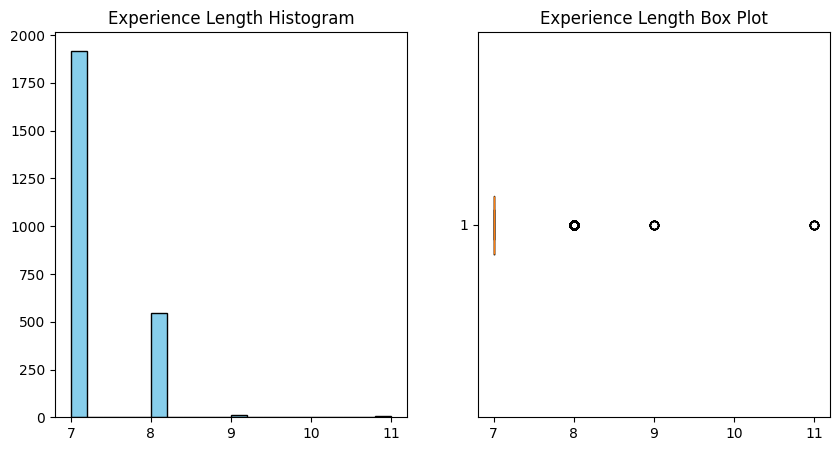

In [150]:
new_df['Experience_Length'].describe()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(new_df['Experience_Length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Experience Length Histogram')
plt.subplot(1, 2, 2)
plt.boxplot(new_df['Experience_Length'], vert=False)
plt.title('Experience Length Box Plot')
plt.show()


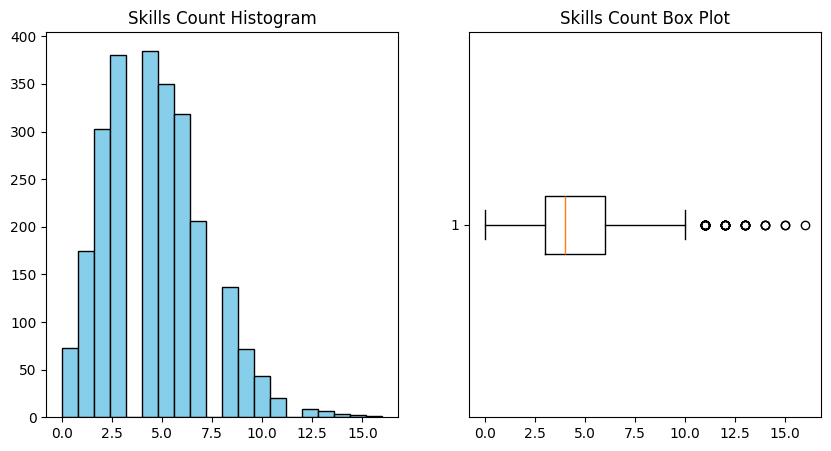

In [151]:
new_df['Skills_Count'].describe()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(new_df['Skills_Count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Skills Count Histogram')
plt.subplot(1, 2, 2)
plt.boxplot(new_df['Skills_Count'], vert=False)
plt.title('Skills Count Box Plot')
plt.show()

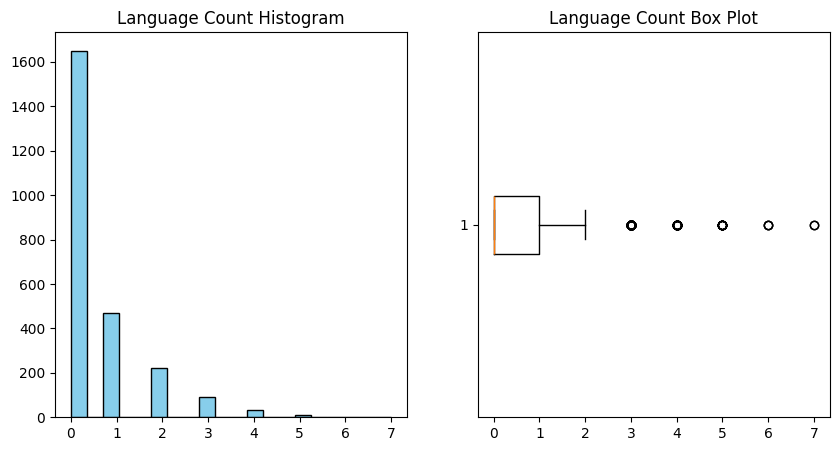

In [152]:
new_df['Languages'].describe()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(new_df['Languages'], bins=20, color='skyblue', edgecolor='black')
plt.title('Language Count Histogram')
plt.subplot(1, 2, 2)
plt.boxplot(new_df['Languages'], vert=False)
plt.title('Language Count Box Plot')
plt.show()

## <span style="color:brown">Q8:

Give a full statistical description for the categorical data columns that can be descriped including all insights and needed figures to visualize them.


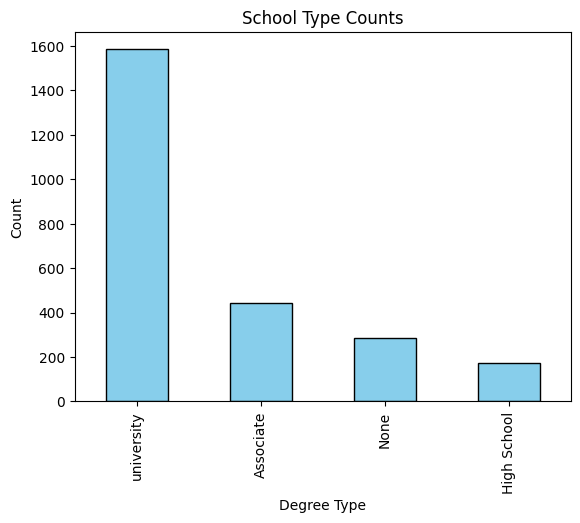

In [153]:
new_df['School_Type'].value_counts()
new_df['School_Type'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('School Type Counts')
plt.xlabel('Degree Type')
plt.ylabel('Count')
plt.show()


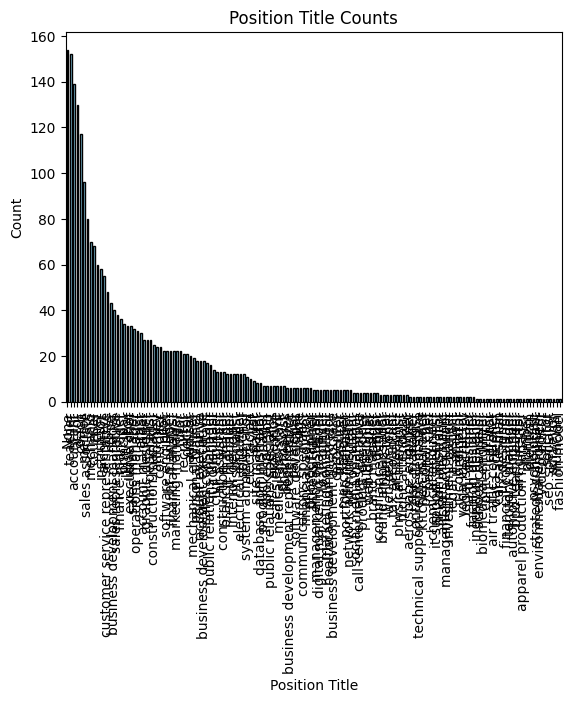

In [154]:
new_df['Position_Title'].value_counts()
new_df['Position_Title'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Position Title Counts')
plt.xlabel('Position Title')
plt.ylabel('Count')
plt.show()

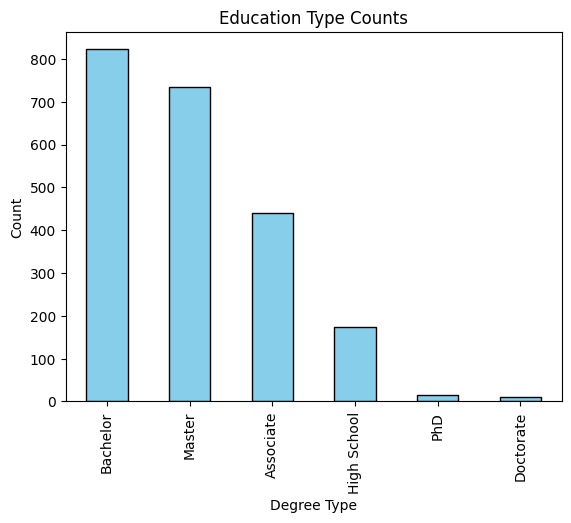

In [155]:
new_df['Education_Type'].value_counts()
new_df['Education_Type'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Education Type Counts')
plt.xlabel('Degree Type')
plt.ylabel('Count')
plt.show()

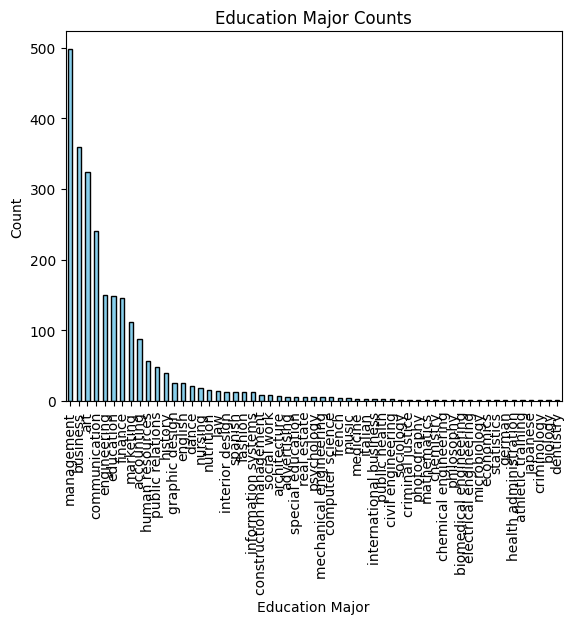

In [156]:
new_df['Education_Major'].value_counts()
new_df['Education_Major'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Education Major Counts')
plt.xlabel('Education Major')
plt.ylabel('Count')
plt.show()

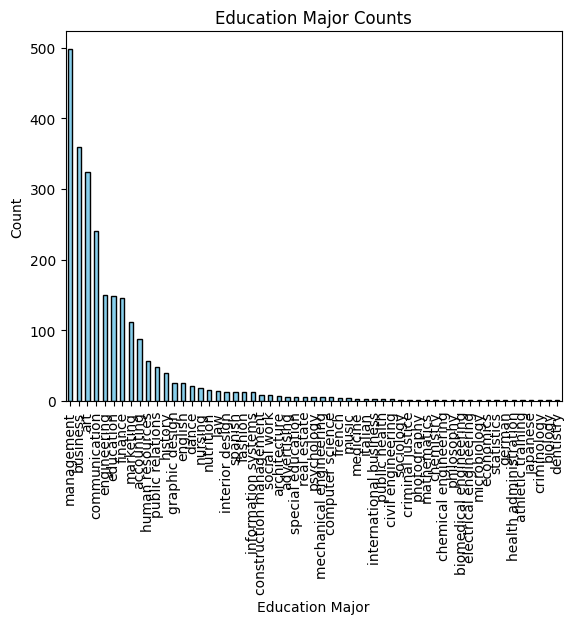

In [157]:
new_df['Education_Major'].value_counts()
new_df['Education_Major'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Education Major Counts')
plt.xlabel('Education Major')
plt.ylabel('Count')
plt.show()

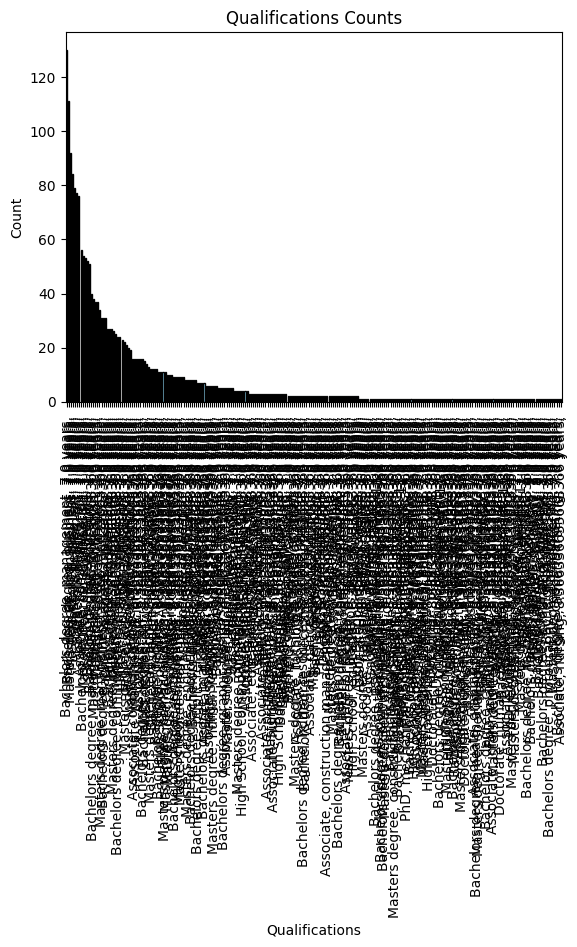

In [158]:
new_df['Qualifications'].value_counts()
new_df['Qualifications'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Qualifications Counts')
plt.xlabel('Qualifications')
plt.ylabel('Count')
plt.show()

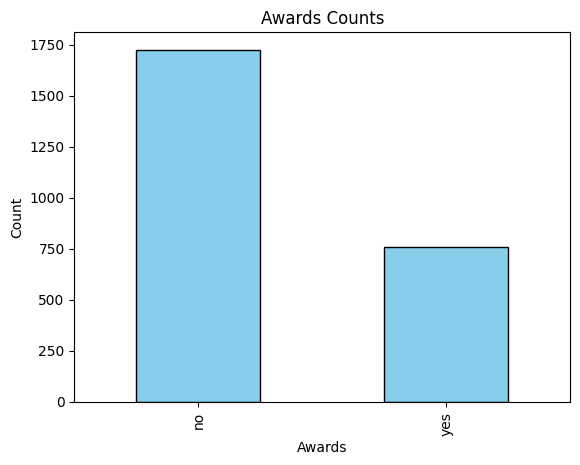

In [159]:
new_df['Awards'].value_counts()
new_df['Awards'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Awards Counts')
plt.xlabel('Awards')
plt.ylabel('Count')
plt.show()

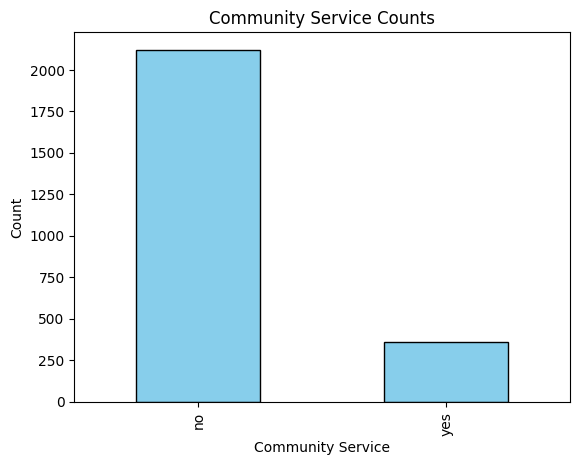

In [160]:
new_df['Community_Service'].value_counts()
new_df['Community_Service'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Community Service Counts')
plt.xlabel('Community Service')
plt.ylabel('Count')
plt.show()

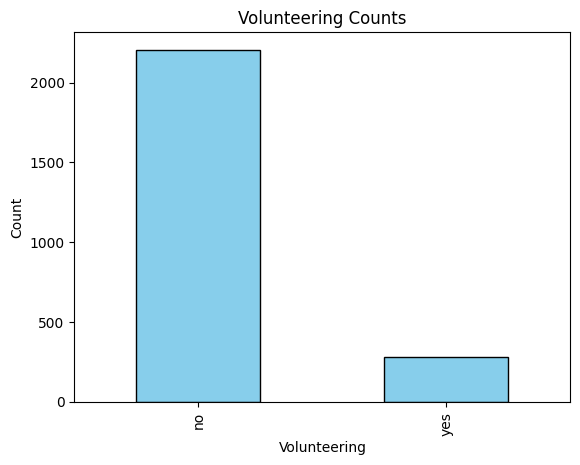

In [161]:
new_df['Volunteering'].value_counts()
new_df['Volunteering'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Volunteering Counts')
plt.xlabel('Volunteering')
plt.ylabel('Count')
plt.show()

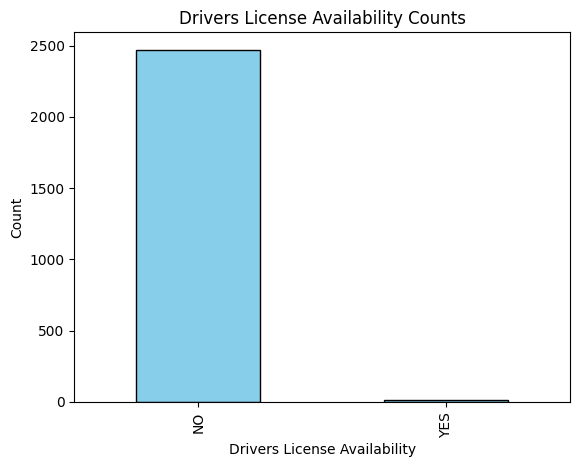

In [162]:
new_df['Drivers_License_Availability'].value_counts()
new_df['Drivers_License_Availability'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Drivers License Availability Counts')
plt.xlabel('Drivers License Availability')
plt.ylabel('Count')
plt.show()

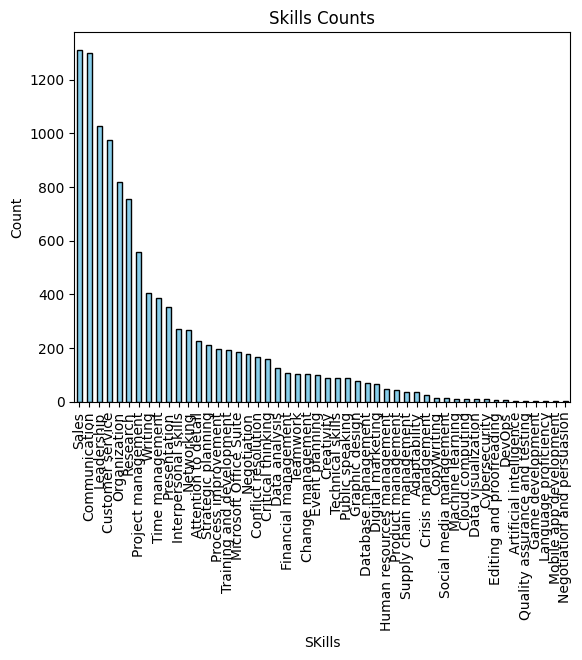

In [163]:
skills_series = new_df['Skills'].apply(pd.Series).stack().reset_index(drop=True)
skill_counts = skills_series.value_counts()
skill_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Skills Counts')
plt.xlabel('SKills')
plt.ylabel('Count')
plt.show()

## Great Job.